# LSTM

TimeSeries or Sequence Data  - 3D tensors of shape(samples, tiuesteps, features

In [1]:
# Import necessary packages: Keras is obtained from Tensorflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the complete data set provided 
data_path = '../data/ucsbdata.csv'
raw_data = pd.read_csv(data_path)
raw_data.head(5)

,Index,R,US10YR,EPS,PER,OPEN,HIGH,LOW,CLOSE,BDIY,...,MYSTERYVAR3,TOM,HULBERTSENTIMENT,BUBBLE,CASH,DEBT,DIVIDEND,RETURN,STOCKS,WAR
0,1952-01-02,NaN,NaN,2.44,9.754098,23.80,23.80,23.80,23.80,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1952-01-03,NaN,NaN,2.44,9.786885,23.88,23.88,23.88,23.88,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1952-01-04,NaN,NaN,2.44,9.803279,23.92,23.92,23.92,23.92,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1952-01-07,NaN,NaN,2.44,9.799180,23.91,23.91,23.91,23.91,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1952-01-08,NaN,NaN,2.44,9.762295,23.82,23.82,23.82,23.82,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# From the EDA will work with complete stock data after the market crash of 2008
initial_start = '2008-08-30'
data = raw_data.loc[raw_data.Index > initial_start]
data.head(5)

,Index,R,US10YR,EPS,PER,OPEN,HIGH,LOW,CLOSE,BDIY,...,MYSTERYVAR3,TOM,HULBERTSENTIMENT,BUBBLE,CASH,DEBT,DIVIDEND,RETURN,STOCKS,WAR
14262,2008-09-02,-0.000925,3.7326,49.78,25.664524,1287.83,1303.04,1272.20,1277.58,6466.0,...,12.805545,1,11.7,102.145351,80.224149,52.613405,42.572673,20.866767,32.085132,43.392387
14263,2008-09-03,-0.021012,3.6990,49.78,25.612294,1276.61,1280.60,1265.59,1274.98,6146.0,...,12.747167,0,-2.1,87.724831,76.736143,59.870426,37.019715,22.681269,35.522825,40.981699
14264,2008-09-04,0.003075,3.6227,49.76,24.855908,1271.80,1271.80,1232.83,1236.83,5874.0,...,12.790740,0,-2.1,96.136801,81.386818,62.591809,45.040654,21.169184,36.668722,43.995059
14265,2008-09-05,0.020380,3.6986,49.76,24.966037,1233.21,1244.94,1217.23,1242.31,5663.0,...,12.944056,0,-2.1,99.741931,81.386818,61.684682,42.572673,20.866767,38.960517,44.597731
14266,2008-09-08,-0.021026,3.6743,49.75,25.483216,1249.50,1274.42,1247.12,1267.79,5492.0,...,12.891218,0,-9.0,98.540221,80.224149,54.427660,45.040654,20.564351,38.960517,47.611092


In [4]:
# Look at the data type for each coloum
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2601 entries, 14262 to 16862
Data columns (total 68 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Index             2601 non-null   object 
 1   R                 2601 non-null   float64
 2   US10YR            2601 non-null   float64
 3   EPS               2601 non-null   float64
 4   PER               2601 non-null   float64
 5   OPEN              2601 non-null   float64
 6   HIGH              2601 non-null   float64
 7   LOW               2601 non-null   float64
 8   CLOSE             2601 non-null   float64
 9   BDIY              2601 non-null   float64
 10  VIX               2601 non-null   float64
 11  PCR               2601 non-null   float64
 12  MVOLE             2601 non-null   float64
 13  DXY               2601 non-null   float64
 14  ASP               2601 non-null   float64
 15  ADVDECL           2601 non-null   float64
 16  FEDFUNDS          2601 non-null   flo

In [5]:
# Convert Int values to float
non_floats = ['URR', 'FOMC', 'PPIR', 'SIM', 'HULBERTSENTIMENT', 'TOM']
for i in non_floats:
    data[i] = data[i].astype(float)

In [6]:
# Recheck datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2601 entries, 14262 to 16862
Data columns (total 68 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Index             2601 non-null   object 
 1   R                 2601 non-null   float64
 2   US10YR            2601 non-null   float64
 3   EPS               2601 non-null   float64
 4   PER               2601 non-null   float64
 5   OPEN              2601 non-null   float64
 6   HIGH              2601 non-null   float64
 7   LOW               2601 non-null   float64
 8   CLOSE             2601 non-null   float64
 9   BDIY              2601 non-null   float64
 10  VIX               2601 non-null   float64
 11  PCR               2601 non-null   float64
 12  MVOLE             2601 non-null   float64
 13  DXY               2601 non-null   float64
 14  ASP               2601 non-null   float64
 15  ADVDECL           2601 non-null   float64
 16  FEDFUNDS          2601 non-null   flo

In [7]:
# Convert the string datatype to a datetime
index_datetime = pd.to_datetime(data['Index']).values
data['Index'] = index_datetime
print(type(data['Index'].values[0]))
# Replace current index with data index
data.set_index('Index', inplace = True)
data.head(5)

<class 'numpy.datetime64'>


,R,US10YR,EPS,PER,OPEN,HIGH,LOW,CLOSE,BDIY,VIX,...,MYSTERYVAR3,TOM,HULBERTSENTIMENT,BUBBLE,CASH,DEBT,DIVIDEND,RETURN,STOCKS,WAR
Index,,,,,,,,,,,,,,,,,,,,,
2008-09-02,-0.000925,3.7326,49.78,25.664524,1287.83,1303.04,1272.20,1277.58,6466.0,21.99,...,12.805545,1.0,11.7,102.145351,80.224149,52.613405,42.572673,20.866767,32.085132,43.392387
2008-09-03,-0.021012,3.6990,49.78,25.612294,1276.61,1280.60,1265.59,1274.98,6146.0,21.43,...,12.747167,0.0,-2.1,87.724831,76.736143,59.870426,37.019715,22.681269,35.522825,40.981699
2008-09-04,0.003075,3.6227,49.76,24.855908,1271.80,1271.80,1232.83,1236.83,5874.0,24.03,...,12.790740,0.0,-2.1,96.136801,81.386818,62.591809,45.040654,21.169184,36.668722,43.995059
2008-09-05,0.020380,3.6986,49.76,24.966037,1233.21,1244.94,1217.23,1242.31,5663.0,23.06,...,12.944056,0.0,-2.1,99.741931,81.386818,61.684682,42.572673,20.866767,38.960517,44.597731
2008-09-08,-0.021026,3.6743,49.75,25.483216,1249.50,1274.42,1247.12,1267.79,5492.0,22.64,...,12.891218,0.0,-9.0,98.540221,80.224149,54.427660,45.040654,20.564351,38.960517,47.611092


In [8]:
# Seperate features from returns 
sp_returns = data['R'].values
features = data.iloc[:,1:].values

# Split data with 80% train data, 20% test
train_percent = 0.2
data_train, data_test, train_labels, test_labels = train_test_split(features,
                                                                    sp_returns,
                                                                    test_size = train_percent, 
                                                                    random_state = 0,
                                                                   shuffle = False)

print(len(features))
print(len(sp_returns))
print("Train data shape", data_train.shape)
print("Test data shape", data_test.shape)

2601
2601
Train data shape (2080, 66)
Test data shape (521, 66)


In [9]:
# Initiate standard scaler
sc = StandardScaler()
# Normalize the data with training data
data_train = sc.fit_transform(data_train)
data_test = sc.transform(data_test)
# check to see if data was correctly normalized
print(np.mean(data_train))
print(np.mean(data_test))
print(np.std(data_train))
print(np.std(data_test))
print(data_train.shape)
print(data_test.shape)

1.839295356786926e-15
0.5495211849312499
1.0000000000000004
1.8280901027184622
(2080, 66)
(521, 66)


In [10]:
# Parameters for transforming to supervised data
lookback = 5 # How many timesteps back; 5 i.e a week
step = 1 # The period at which we sample data i.e 1 day
batch_size =  30 #number of samples per batch i.e a month

In [11]:
# Train and Test data generator
train_generator =  TimeseriesGenerator(data_train, train_labels, length=lookback,
                                      batch_size=batch_size, sampling_rate=step)
test_generator = TimeseriesGenerator(data_test, test_labels, length=lookback,
                                    batch_size=batch_size, sampling_rate=step)

In [16]:
# Create and test model
def build_model():
    model = Sequential()
    model.add(LSTM(32,
                  activation='relu',
                  input_shape = (lookback, 66)))
    model.add(Dropout(0.5))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='ADAM', loss = 'mae')
    return model

In [17]:
model = build_model()
history = model.fit(train_generator,validation_data = test_generator,epochs=50)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 70 steps, validate for 18 steps
Epoch 1/50
70/70 [==============================] - 2s 24ms/step - loss: 0.1154 - val_loss: 0.1649
Epoch 2/50
70/70 [==============================] - 0s 7ms/step - loss: 0.0523 - val_loss: 0.0589
Epoch 3/50
70/70 [==============================] - 0s 7ms/step - loss: 0.0354 - val_loss: 0.0726
Epoch 4/50
70/70 [==============================] - 0s 7ms/step - loss: 0.0261 - val_loss: 0.0466
Epoch 5/50
70/70 [==============================] - 0s 7ms/step - loss: 0.0220 - val_loss: 0.0306
Epoch 6/50
70/70 [==============================] - 0s 7ms/step - loss: 0.0197 - val_loss: 0.0231
Epoch 7/50
70/70 [==============================] - 1s 8ms/step - loss: 0.0171 - val_loss: 0.0173
Epoch 8/50
70/70 [==============================] - 0s 7ms/step - loss: 0.0154 - val_loss: 0.0156
Epoch 9/50
70/70 [==============================] - 1s 7ms/step - loss: 0.0136 - val_loss: 0.0145
Epoch 10/50
70/70 [======

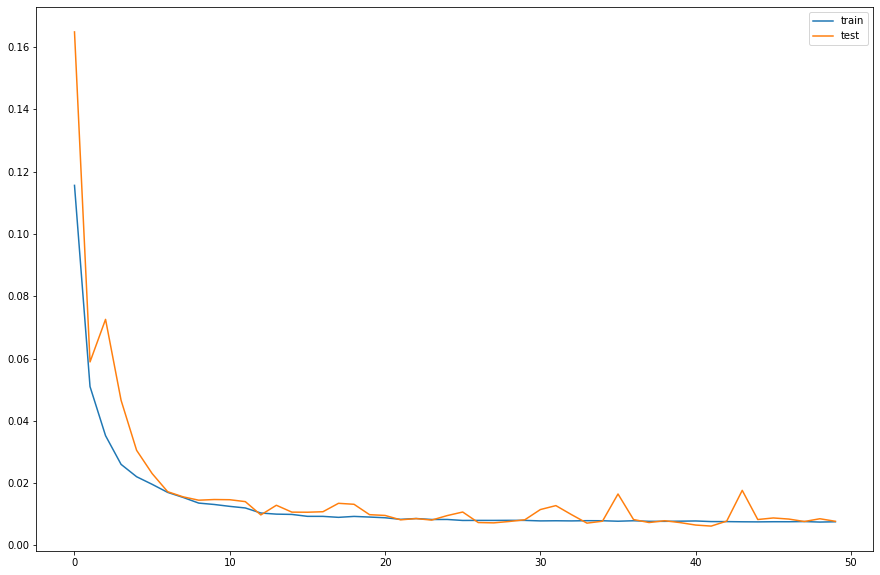

In [18]:
plt.figure(figsize=(15,10))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()